In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [12]:
from sklearn.metrics import r2_score,confusion_matrix,classification_report

In [13]:
import xgboost as xgb

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
df=pd.read_csv("vgsales.csv")


In [17]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [18]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [19]:
pub_val=df['Publisher'].mode()[0]


In [20]:
df['Publisher']=df['Publisher'].fillna(pub_val)

In [21]:
year_val=df['Year'].mode()[0]


In [22]:
year_val

2009.0

In [23]:
df['Year']=df['Year'].fillna(year_val)


In [24]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [25]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [26]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.448789,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.790533,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [28]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [29]:
df.shape

(16598, 11)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

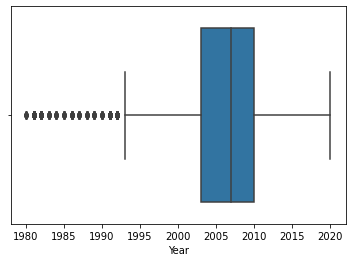

In [30]:
sns.boxplot(df['Year'])

In [31]:
q1=df['Year'].quantile(0.25)

In [32]:
q3=df['Year'].quantile(0.75)

In [33]:
IQR=q3-q1

In [34]:
lower=q1-1.5*IQR

In [35]:
upper=q3+1.5*IQR

In [36]:
df=df[(df['Year']>lower) & (df['Year']<upper)]

In [37]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NA_Sales'>

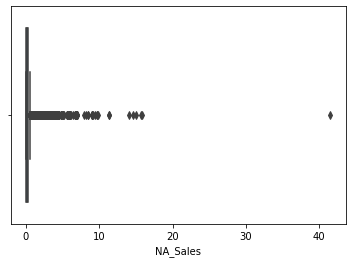

In [38]:
sns.boxplot(df['NA_Sales'])

In [39]:
q1=df['NA_Sales'].quantile(0.25)

In [40]:
q3=df['NA_Sales'].quantile(0.75)

In [41]:
IQR=q3-q1

In [42]:
lower=q1-1.5*IQR

In [43]:
upper=q3+1.5*IQR

In [44]:
df=df[(df['NA_Sales']>lower) & (df['NA_Sales']<upper)]

In [45]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.00,0.00,6.28
161,162,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.50
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87
219,220,FIFA 15,PS3,2014.0,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EU_Sales'>

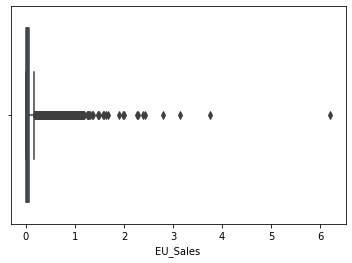

In [46]:
sns.boxplot(df['EU_Sales'])

In [47]:
q1=df['EU_Sales'].quantile(0.25)

In [48]:
q3=df['EU_Sales'].quantile(0.75)

In [49]:
IQR=q3-q1

In [50]:
lower=q1-1.5*IQR

In [51]:
upper=q3+1.5*IQR

In [52]:
df=df[(df['EU_Sales']>lower) & (df['EU_Sales']<upper)]

In [53]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87
242,243,Dragon Quest VII: Warriors of Eden,PS,2000.0,Role-Playing,Enix Corporation,0.20,0.14,4.10,0.02,4.47
338,339,Friend Collection,DS,2009.0,Misc,Nintendo,0.00,0.00,3.67,0.00,3.67
348,349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63
383,384,Monster Hunter 4,3DS,2013.0,Role-Playing,Capcom,0.00,0.00,3.44,0.00,3.44
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JP_Sales'>

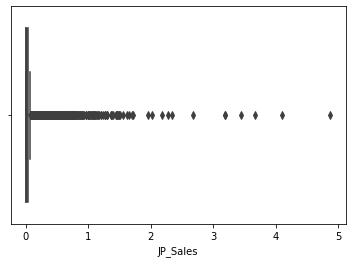

In [54]:
sns.boxplot(df['JP_Sales'])

In [55]:
q1=df['JP_Sales'].quantile(0.25)

In [56]:
q3=df['JP_Sales'].quantile(0.75)

In [57]:
IQR=q3-q1

In [58]:
lower=q1-1.5*IQR

In [59]:
upper=q3+1.5*IQR

In [60]:
df=df[(df['JP_Sales']>lower) & (df['JP_Sales']<upper)]

In [61]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
701,703,FIFA Soccer 09,PS2,2008.0,Sports,Electronic Arts,0.38,0.07,0.01,1.82,2.28
918,920,High School Musical: Sing It!,PS2,2007.0,Misc,Disney Interactive Studios,0.47,0.08,0.00,1.33,1.87
1249,1251,The Simpsons Game,PS2,2007.0,Action,Electronic Arts,0.35,0.03,0.00,1.13,1.51
1381,1383,Need For Speed: Undercover,PS2,2008.0,Racing,Electronic Arts,0.38,0.08,0.03,0.93,1.40
1426,1428,SingStar Abba,PS2,2008.0,Misc,Sony Computer Entertainment,0.23,0.04,0.00,1.09,1.36
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rank'>

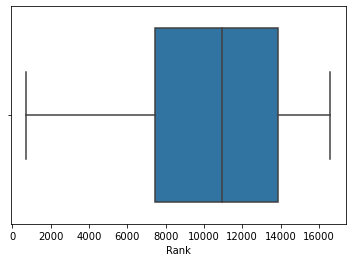

In [62]:
sns.boxplot(df['Rank'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Other_Sales'>

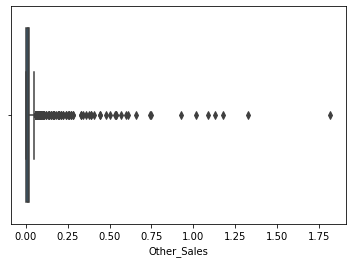

In [63]:
sns.boxplot(df['Other_Sales'])

In [64]:
q1=df['Other_Sales'].quantile(0.25)

In [65]:
q3=df['Other_Sales'].quantile(0.75)

In [66]:
IQR=q3-q1

In [67]:
lower=q1-1.5*IQR

In [68]:
upper=q3+1.5*IQR

In [69]:
df=df[(df['Other_Sales']>lower) & (df['Other_Sales']<upper)]

In [70]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2799,2801,Mortal Kombat 4,N64,1998.0,Fighting,GT Interactive,0.55,0.17,0.0,0.01,0.73
2805,2807,Oddworld: Munch's Oddysee,XB,2001.0,Platform,Atari,0.54,0.16,0.0,0.03,0.73
2813,2815,Full Spectrum Warrior,XB,2004.0,Strategy,THQ,0.54,0.16,0.0,0.03,0.73
2823,2825,James Bond 007: Agent Under Fire,GC,2002.0,Shooter,Electronic Arts,0.56,0.15,0.0,0.02,0.72
2834,2836,Dead to Rights,XB,2002.0,Shooter,Electronic Arts,0.53,0.17,0.0,0.03,0.72
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01


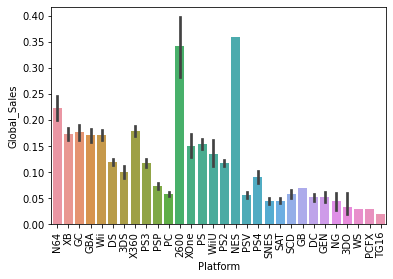

In [71]:
sns.barplot(x=df['Platform'],y=df['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

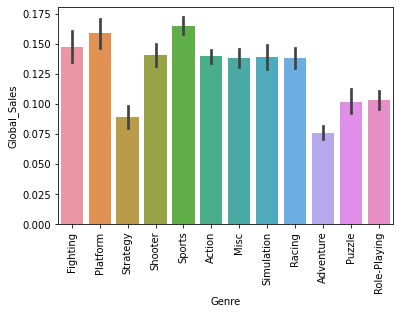

In [72]:
sns.barplot(x=df['Genre'],y=df['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

In [73]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2799,2801,Mortal Kombat 4,N64,1998.0,Fighting,GT Interactive,0.55,0.17,0.0,0.01,0.73
2805,2807,Oddworld: Munch's Oddysee,XB,2001.0,Platform,Atari,0.54,0.16,0.0,0.03,0.73
2813,2815,Full Spectrum Warrior,XB,2004.0,Strategy,THQ,0.54,0.16,0.0,0.03,0.73
2823,2825,James Bond 007: Agent Under Fire,GC,2002.0,Shooter,Electronic Arts,0.56,0.15,0.0,0.02,0.72
2834,2836,Dead to Rights,XB,2002.0,Shooter,Electronic Arts,0.53,0.17,0.0,0.03,0.72
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NA_Sales', ylabel='Density'>

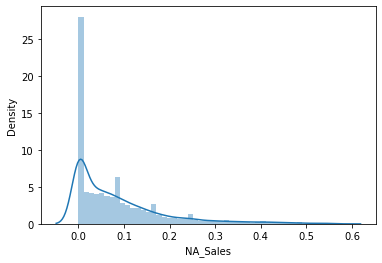

In [74]:
sns.distplot(df['NA_Sales'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EU_Sales', ylabel='Density'>

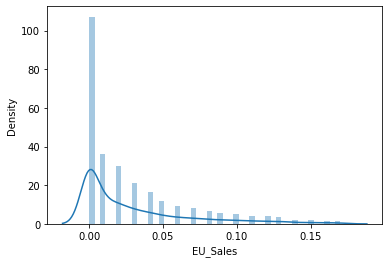

In [75]:
sns.distplot(df['EU_Sales'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='JP_Sales', ylabel='Density'>

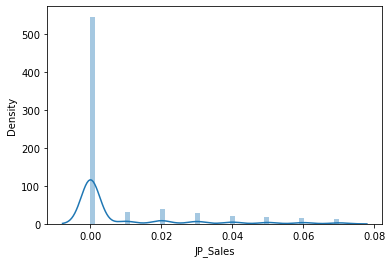

In [76]:
sns.distplot(df['JP_Sales'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Other_Sales', ylabel='Density'>

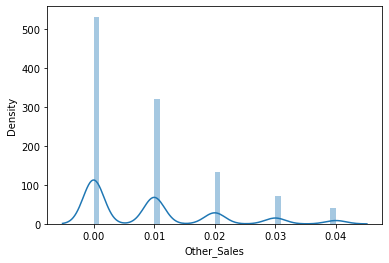

In [77]:
sns.distplot(df['Other_Sales'])

In [78]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2799,2801,Mortal Kombat 4,N64,1998.0,Fighting,GT Interactive,0.55,0.17,0.0,0.01,0.73
2805,2807,Oddworld: Munch's Oddysee,XB,2001.0,Platform,Atari,0.54,0.16,0.0,0.03,0.73
2813,2815,Full Spectrum Warrior,XB,2004.0,Strategy,THQ,0.54,0.16,0.0,0.03,0.73
2823,2825,James Bond 007: Agent Under Fire,GC,2002.0,Shooter,Electronic Arts,0.56,0.15,0.0,0.02,0.72
2834,2836,Dead to Rights,XB,2002.0,Shooter,Electronic Arts,0.53,0.17,0.0,0.03,0.72
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01


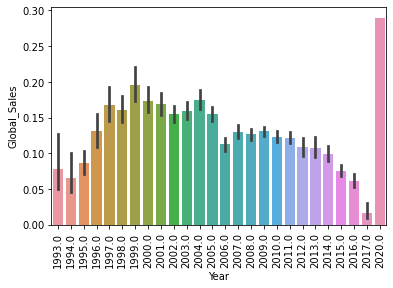

In [79]:
sns.barplot(x=df['Year'],y=df['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

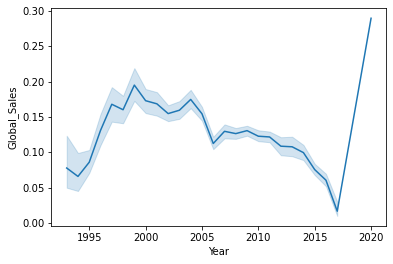

In [80]:
sns.lineplot(x=df['Year'],y=df['Global_Sales'])

# Top 10 Publisher with highest Global Sales

In [81]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2799,2801,Mortal Kombat 4,N64,1998.0,Fighting,GT Interactive,0.55,0.17,0.0,0.01,0.73
2805,2807,Oddworld: Munch's Oddysee,XB,2001.0,Platform,Atari,0.54,0.16,0.0,0.03,0.73
2813,2815,Full Spectrum Warrior,XB,2004.0,Strategy,THQ,0.54,0.16,0.0,0.03,0.73
2823,2825,James Bond 007: Agent Under Fire,GC,2002.0,Shooter,Electronic Arts,0.56,0.15,0.0,0.02,0.72
2834,2836,Dead to Rights,XB,2002.0,Shooter,Electronic Arts,0.53,0.17,0.0,0.03,0.72
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01


In [82]:
new_df=df[['Publisher','Global_Sales','Year']]

In [83]:
new_df

,Publisher,Global_Sales,Year
2799,GT Interactive,0.73,1998.0
2805,Atari,0.73,2001.0
2813,THQ,0.73,2004.0
2823,Electronic Arts,0.72,2002.0
2834,Electronic Arts,0.72,2002.0
...,...,...,...
16593,Kemco,0.01,2002.0
16594,Infogrames,0.01,2003.0
16595,Activision,0.01,2008.0
16596,7G//AMES,0.01,2010.0


In [84]:
top_10_df=new_df.sort_values(by="Global_Sales",ascending=False)


In [85]:
top_10_df=top_10_df[:10]

In [86]:
top_10_df

,Publisher,Global_Sales,Year
2799,GT Interactive,0.73,1998.0
2813,THQ,0.73,2004.0
2805,Atari,0.73,2001.0
2823,Electronic Arts,0.72,2002.0
2834,Electronic Arts,0.72,2002.0
2870,Atari,0.71,2002.0
2876,Konami Digital Entertainment,0.71,2002.0
2879,Universal Interactive,0.71,2002.0
2884,Acclaim Entertainment,0.71,1999.0
2896,Activision,0.71,2005.0


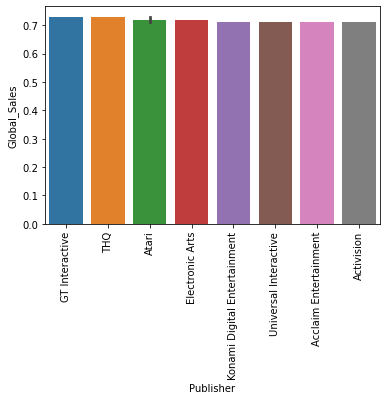

In [87]:
sns.barplot(x=top_10_df['Publisher'],y=top_10_df['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

In [88]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2799,2801,Mortal Kombat 4,N64,1998.0,Fighting,GT Interactive,0.55,0.17,0.0,0.01,0.73
2805,2807,Oddworld: Munch's Oddysee,XB,2001.0,Platform,Atari,0.54,0.16,0.0,0.03,0.73
2813,2815,Full Spectrum Warrior,XB,2004.0,Strategy,THQ,0.54,0.16,0.0,0.03,0.73
2823,2825,James Bond 007: Agent Under Fire,GC,2002.0,Shooter,Electronic Arts,0.56,0.15,0.0,0.02,0.72
2834,2836,Dead to Rights,XB,2002.0,Shooter,Electronic Arts,0.53,0.17,0.0,0.03,0.72
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01


# Global Sales for Top 10 Years 

In [89]:
new_df=df[['Name','Platform','Year','Global_Sales','Genre']]

In [90]:
new_df

,Name,Platform,Year,Global_Sales,Genre
2799,Mortal Kombat 4,N64,1998.0,0.73,Fighting
2805,Oddworld: Munch's Oddysee,XB,2001.0,0.73,Platform
2813,Full Spectrum Warrior,XB,2004.0,0.73,Strategy
2823,James Bond 007: Agent Under Fire,GC,2002.0,0.72,Shooter
2834,Dead to Rights,XB,2002.0,0.72,Shooter
...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,0.01,Platform
16594,Men in Black II: Alien Escape,GC,2003.0,0.01,Shooter
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,0.01,Racing
16596,Know How 2,DS,2010.0,0.01,Puzzle


In [91]:
new_df=new_df.sort_values(by="Global_Sales",ascending=False)


In [92]:
new_df=new_df[:10]

In [93]:
new_df

,Name,Platform,Year,Global_Sales,Genre
2799,Mortal Kombat 4,N64,1998.0,0.73,Fighting
2813,Full Spectrum Warrior,XB,2004.0,0.73,Strategy
2805,Oddworld: Munch's Oddysee,XB,2001.0,0.73,Platform
2823,James Bond 007: Agent Under Fire,GC,2002.0,0.72,Shooter
2834,Dead to Rights,XB,2002.0,0.72,Shooter
2870,Godzilla: Destroy All Monsters Melee,GC,2002.0,0.71,Fighting
2876,Yu-Gi-Oh! The Falsebound Kingdom,GC,2002.0,0.71,Strategy
2879,Spyro: Enter the Dragonfly,GC,2002.0,0.71,Platform
2884,WWF Attitude,N64,1999.0,0.71,Fighting
2896,Doom 3: Resurrection of Evil,XB,2005.0,0.71,Shooter


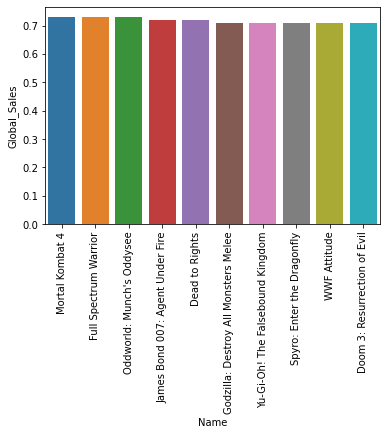

In [94]:
sns.barplot(x=new_df['Name'],y=new_df['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

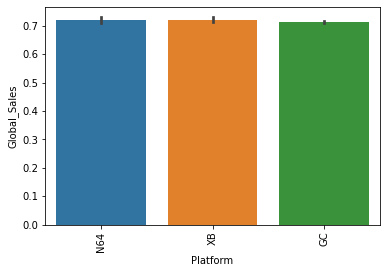

In [95]:
sns.barplot(x=new_df['Platform'],y=new_df['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

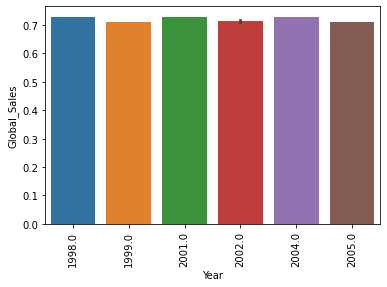

In [96]:
sns.barplot(x=new_df['Year'],y=new_df['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

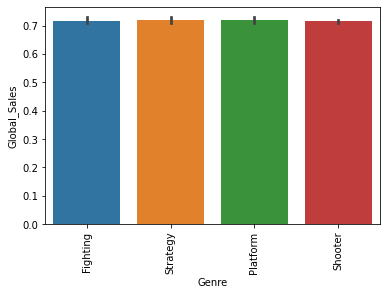

In [97]:
sns.barplot(x=new_df['Genre'],y=new_df['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

In [98]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2799,2801,Mortal Kombat 4,N64,1998.0,Fighting,GT Interactive,0.55,0.17,0.0,0.01,0.73
2805,2807,Oddworld: Munch's Oddysee,XB,2001.0,Platform,Atari,0.54,0.16,0.0,0.03,0.73
2813,2815,Full Spectrum Warrior,XB,2004.0,Strategy,THQ,0.54,0.16,0.0,0.03,0.73
2823,2825,James Bond 007: Agent Under Fire,GC,2002.0,Shooter,Electronic Arts,0.56,0.15,0.0,0.02,0.72
2834,2836,Dead to Rights,XB,2002.0,Shooter,Electronic Arts,0.53,0.17,0.0,0.03,0.72
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01


In [99]:
df['Global_Sales_Range']=pd.qcut(df['Global_Sales'],4)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_9788\3086860718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Global_Sales_Range']=pd.qcut(df['Global_Sales'],4)


In [100]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Range
2799,2801,Mortal Kombat 4,N64,1998.0,Fighting,GT Interactive,0.55,0.17,0.0,0.01,0.73,"(0.19, 0.73]"
2805,2807,Oddworld: Munch's Oddysee,XB,2001.0,Platform,Atari,0.54,0.16,0.0,0.03,0.73,"(0.19, 0.73]"
2813,2815,Full Spectrum Warrior,XB,2004.0,Strategy,THQ,0.54,0.16,0.0,0.03,0.73,"(0.19, 0.73]"
2823,2825,James Bond 007: Agent Under Fire,GC,2002.0,Shooter,Electronic Arts,0.56,0.15,0.0,0.02,0.72,"(0.19, 0.73]"
2834,2836,Dead to Rights,XB,2002.0,Shooter,Electronic Arts,0.53,0.17,0.0,0.03,0.72,"(0.19, 0.73]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.00,0.01,"(0.009000000000000001, 0.04]"
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01,"(0.009000000000000001, 0.04]"
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.00,0.01,"(0.009000000000000001, 0.04]"
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01,"(0.009000000000000001, 0.04]"


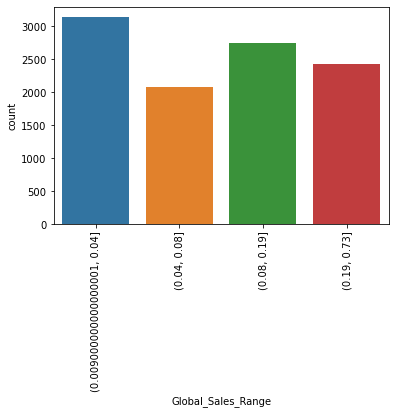

In [101]:
sns.countplot(x=df['Global_Sales_Range'])
plt.xticks(rotation=90)
plt.show()

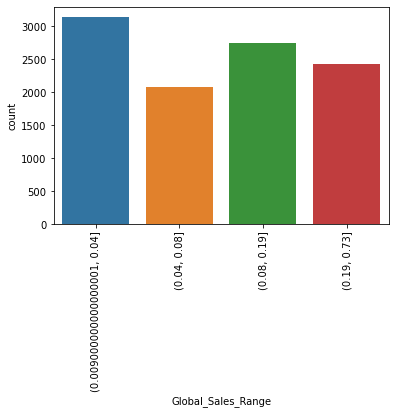

In [102]:
sns.countplot(x=df['Global_Sales_Range'])
plt.xticks(rotation=90)
plt.show()

In [98]:
le=LabelEncoder()


In [99]:
df['Name']=le.fit_transform(df['Name'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_18396\1770570860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name']=le.fit_transform(df['Name'])


In [100]:
df['Platform']=le.fit_transform(df['Platform'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18396\136206962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Platform']=le.fit_transform(df['Platform'])


In [101]:
df['Genre']=le.fit_transform(df['Genre'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18396\1730483329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre']=le.fit_transform(df['Genre'])


In [102]:
df['Publisher']=le.fit_transform(df['Publisher'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18396\1738076978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publisher']=le.fit_transform(df['Publisher'])


In [103]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2799,2801,4192,9,1998.0,2,161,0.55,0.17,0.0,0.01,0.73
2805,2807,4754,28,2001.0,4,47,0.54,0.16,0.0,0.03,0.73
2813,2815,2363,28,2004.0,11,435,0.54,0.16,0.0,0.03,0.73
2823,2825,3165,7,2002.0,8,123,0.56,0.15,0.0,0.02,0.72
2834,2836,1460,28,2002.0,8,123,0.53,0.17,0.0,0.03,0.72
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,7631,6,2002.0,4,241,0.01,0.00,0.0,0.00,0.01
16594,16597,4004,7,2003.0,8,214,0.01,0.00,0.0,0.00,0.01
16595,16598,5646,15,2008.0,6,20,0.00,0.00,0.0,0.00,0.01
16596,16599,3467,4,2010.0,5,7,0.00,0.01,0.0,0.00,0.01


In [104]:
sc=StandardScaler()


In [105]:
X=df.drop("Global_Sales",axis=1)

In [106]:
y=df['Global_Sales']

In [107]:
X=sc.fit_transform(X)


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [109]:
X_train.shape

(8314, 10)

In [110]:
y_train.shape

(8314,)

In [111]:
X_test.shape

(2079, 10)

In [112]:
y_test.shape

(2079,)

# RandomForestRegressor

In [113]:
rfr=RandomForestRegressor()


In [114]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [115]:
y_pred=rfr.predict(X_train)


In [116]:
y_pred

array([0.02  , 0.6011, 0.09  , ..., 0.08  , 0.34  , 0.04  ])

In [117]:
r2_score(y_train,y_pred)

0.9999967986645356

In [118]:
y_pred=rfr.predict(X_test)


In [119]:
y_pred

array([0.14, 0.16, 0.19, ..., 0.05, 0.26, 0.1 ])

In [120]:
r2_score(y_test,y_pred)

0.9999575523701886

In [121]:
kf=KFold(5)


In [122]:
scores=cross_val_score(rfr,X_test,y_test,cv=kf)


In [123]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.9996622746757768
1 0.9999144027569974
2 0.9994952641758483
3 0.9999356320984255
4 0.9998880437814492


In [124]:
scores.mean()

0.9997791234976994

In [125]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2799,2801,4192,9,1998.0,2,161,0.55,0.17,0.0,0.01,0.73
2805,2807,4754,28,2001.0,4,47,0.54,0.16,0.0,0.03,0.73
2813,2815,2363,28,2004.0,11,435,0.54,0.16,0.0,0.03,0.73
2823,2825,3165,7,2002.0,8,123,0.56,0.15,0.0,0.02,0.72
2834,2836,1460,28,2002.0,8,123,0.53,0.17,0.0,0.03,0.72
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,7631,6,2002.0,4,241,0.01,0.00,0.0,0.00,0.01
16594,16597,4004,7,2003.0,8,214,0.01,0.00,0.0,0.00,0.01
16595,16598,5646,15,2008.0,6,20,0.00,0.00,0.0,0.00,0.01
16596,16599,3467,4,2010.0,5,7,0.00,0.01,0.0,0.00,0.01


# XGBRegressor

In [126]:
xgb_i=xgb.XGBRegressor()

In [127]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [128]:
y_pred=xgb_i.predict(X_test)

In [129]:
r2_score(y_test,y_pred)

0.9999536556698541

In [130]:
kf=KFold(5)


In [131]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=kf)


In [132]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.9998275278061635
1 0.999853250895816
2 0.9997235678194801
3 0.9999081749771873
4 0.9998842153826359


In [133]:
scores.mean()

0.9998393473762566

# KNeighborsRegressor

In [134]:
knc=KNeighborsRegressor()


In [135]:
knc.fit(X_train,y_train)

KNeighborsRegressor()

In [136]:
y_pred=knc.predict(X_train)

In [137]:
r2_score(y_train,y_pred)

0.9851455052997056

In [138]:
y_pred=knc.predict(X_test)

In [139]:
r2_score(y_test,y_pred)

0.9810007038356336

In [140]:
kf=KFold(5)


In [141]:
scores=cross_val_score(knc,X_test,y_test,cv=kf)


In [142]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.9656488380189747
1 0.9690593166975693
2 0.9646642444236966
3 0.9615646405761418
4 0.9609811460251031


In [143]:
scores.mean()

0.9643836371482971

# LinearRegression

In [144]:
lr=LinearRegression()


In [145]:
lr.fit(X_train,y_train)

LinearRegression()

In [146]:
y_pred=lr.predict(X_train)


In [147]:
r2_score(y_train,y_pred)

0.9984537036638667

In [148]:
y_pred=lr.predict(X_test)


In [149]:
r2_score(y_test,y_pred)

0.9985473622931332

In [150]:
kf=KFold(5)


In [151]:
scores=cross_val_score(lr,X_test,y_test,cv=kf)


In [152]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.9985372815826404
1 0.9987132750314703
2 0.9986111244430499
3 0.9984512307682386
4 0.9982777198079319


In [153]:
scores.mean()

0.9985181263266663

In [154]:
kf=KFold(5)


In [155]:
scores=cross_val_score(knc,X_test,y_test,cv=kf)


In [156]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.9656488380189747
1 0.9690593166975693
2 0.9646642444236966
3 0.9615646405761418
4 0.9609811460251031


In [157]:
scores.mean()

0.9643836371482971

# ANN

In [158]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(10,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='linear')     
])

In [161]:
model.compile(optimizer='adam',
    loss='mean_squared_error',
    metrics=['mse'])

In [178]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
260/260 [==============================] - 0s 909us/step - loss: 3.0771e-04 - mse: 3.0771e-04
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 2.5800e-04 - mse: 2.5800e-04
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 2.2694e-04 - mse: 2.2694e-04
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 1.9610e-04 - mse: 1.9610e-04
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 1.7666e-04 - mse: 1.7666e-04
Epoch 6/100
260/260 [==============================] - 0s 762us/step - loss: 1.6298e-04 - mse: 1.6298e-04
Epoch 7/100
260/260 [==============================] - 0s 759us/step - loss: 1.4542e-04 - mse: 1.4542e-04
Epoch 8/100
260/260 [==============================] - 0s 869us/step - loss: 1.3010e-04 - mse: 1.3010e-04
Epoch 9/100
260/260 [==============================] - 0s 776us/step - loss: 1.1721e-04 - mse: 1.1721e-04
Epoch 10/100
260/260 [==============================] 

In [179]:
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 1ms/step - loss: 1.9132e-05 - mse: 1.9132e-05


[1.913213600346353e-05, 1.913213600346353e-05]

In [180]:
y_pred=model.predict(X_test)

65/65 [==============================] - 0s 1ms/step


In [181]:
y_test[:10]

9259     0.14
8509     0.16
7919     0.19
6432     0.27
9317     0.14
15065    0.02
14086    0.04
6735     0.25
3205     0.63
9019     0.14
Name: Global_Sales, dtype: float64

In [182]:
y_pred[:10]

array([[0.1390802 ],
       [0.16520393],
       [0.18818338],
       [0.26664463],
       [0.13818857],
       [0.02197911],
       [0.03592677],
       [0.25249398],
       [0.6256907 ],
       [0.14656445]], dtype=float32)

In [183]:
r2_score(y_test,y_pred)

0.9988840603469265